In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/country-comparison-dataset-usa-and-more/country_comparison_large_dataset.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/country-comparison-dataset-usa-and-more/country_comparison_large_dataset.csv')

In [4]:
df

,Country,Year,GDP (in Trillions USD),GDP per Capita (in USD),Inflation Rate (%),Population (in Millions),Population Growth Rate (%),Urban Population (%),Life Expectancy (Years),Healthcare Expenditure per Capita (USD),...,Poverty Rate (%),Number of International Visitors (in Millions),Tourism Revenue (in Billion USD),Agricultural Land (%),Unemployment Rate (%),Labor Force Participation Rate (%),"Crime Rate (per 100,000)",Corruption Perception Index,Freedom of Press Index,Voting Participation Rate (%)
0,USA,2000,20.87,65455.0,2.28,330.34,0.58,83.42,78.39,11209.00,...,10.98,80.80,210.98,42.37,3.55,65.52,287.40,67.41,45.27,68.81
1,Russia,2000,1.64,10923.0,3.25,141.81,0.10,72.67,69.91,534.45,...,12.89,24.70,36.47,12.53,4.63,57.54,497.50,30.90,146.10,65.00
2,Canada,2000,1.65,47932.0,1.96,36.63,0.90,79.54,84.60,5113.50,...,9.46,22.33,29.52,7.22,5.43,65.06,795.20,74.74,16.42,63.00
3,China,2000,13.64,10060.0,2.43,1446.93,0.31,58.56,76.09,459.00,...,2.04,62.20,115.80,54.00,3.68,63.13,102.90,41.75,185.32,72.14
4,India,2000,2.98,2102.1,4.87,1313.76,1.04,34.09,68.78,76.07,...,22.25,11.25,29.12,57.60,7.31,52.10,245.25,40.12,136.36,67.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Russia,2023,1.64,10978.0,3.20,138.04,0.10,71.56,73.47,539.70,...,12.36,24.55,35.28,12.54,4.69,58.62,477.50,31.02,150.15,65.33
140,Canada,2023,1.73,44804.0,1.88,35.59,0.93,83.11,79.17,5139.75,...,9.24,21.32,29.13,6.96,5.44,64.61,800.80,72.37,15.52,62.28
141,China,2023,13.72,9870.0,2.29,1407.79,0.29,61.86,73.10,430.20,...,1.92,64.67,116.76,56.54,3.58,65.77,95.30,43.22,184.26,71.14
142,India,2023,2.79,2070.6,4.70,1411.74,1.03,34.05,70.09,76.07,...,21.94,10.74,28.00,57.36,7.16,48.25,240.75,41.36,133.28,66.20


In [5]:
df.describe()

,Year,GDP (in Trillions USD),GDP per Capita (in USD),Inflation Rate (%),Population (in Millions),Population Growth Rate (%),Urban Population (%),Life Expectancy (Years),Healthcare Expenditure per Capita (USD),Doctor-to-Patient Ratio,...,Poverty Rate (%),Number of International Visitors (in Millions),Tourism Revenue (in Billion USD),Agricultural Land (%),Unemployment Rate (%),Labor Force Participation Rate (%),"Crime Rate (per 100,000)",Corruption Perception Index,Freedom of Press Index,Voting Participation Rate (%)
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.00000,144.000000,144.000000,144.000000
mean,2011.500000,7.186667,31118.720139,2.653125,550.913542,0.702153,69.617222,77.323194,3747.403819,2.598194,...,10.975139,35.271806,82.536458,38.506458,4.980833,61.001181,474.94375,55.235347,92.348403,70.296736
std,6.946348,7.807163,24438.786379,1.067940,600.169798,0.417256,17.862888,5.411696,3914.846503,1.029520,...,5.885337,27.234486,69.991391,20.921471,1.327104,5.520543,292.35926,18.662935,65.630659,10.602064
min,2000.000000,1.270000,2009.700000,1.440000,23.900000,0.100000,33.600000,66.140000,69.420000,0.860000,...,1.910000,8.970000,26.850000,6.730000,3.430000,47.700000,95.30000,28.560000,15.280000,57.240000
25%,2005.750000,1.630000,9972.500000,1.887500,37.342500,0.300000,59.940000,73.042500,447.750000,1.810000,...,9.317500,10.960000,29.812500,13.010000,3.735000,59.340000,250.43750,40.070000,25.137500,63.420000
50%,2011.500000,2.275000,27548.000000,2.330000,233.770000,0.745000,77.330000,78.020000,2747.700000,2.735000,...,10.040000,23.370000,46.995000,48.140000,4.760000,62.230000,395.35000,54.820000,90.220000,67.615000
75%,2017.250000,14.232500,52231.500000,3.072500,1341.540000,1.010000,83.110000,81.715000,5379.400000,3.417500,...,12.360000,64.625000,120.870000,55.090000,5.517500,65.112500,796.40000,73.410000,150.337500,71.192500
max,2023.000000,22.240000,68120.000000,5.040000,1462.310000,1.360000,90.040000,87.150000,11528.000000,4.200000,...,22.970000,83.600000,230.340000,62.940000,7.870000,69.230000,943.20000,80.850000,185.320000,96.600000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Country                                         144 non-null    object 
 1   Year                                            144 non-null    int64  
 2   GDP (in Trillions USD)                          144 non-null    float64
 3   GDP per Capita (in USD)                         144 non-null    float64
 4   Inflation Rate (%)                              144 non-null    float64
 5   Population (in Millions)                        144 non-null    float64
 6   Population Growth Rate (%)                      144 non-null    float64
 7   Urban Population (%)                            144 non-null    float64
 8   Life Expectancy (Years)                         144 non-null    float64
 9   Healthcare Expenditure per Capita (USD)    

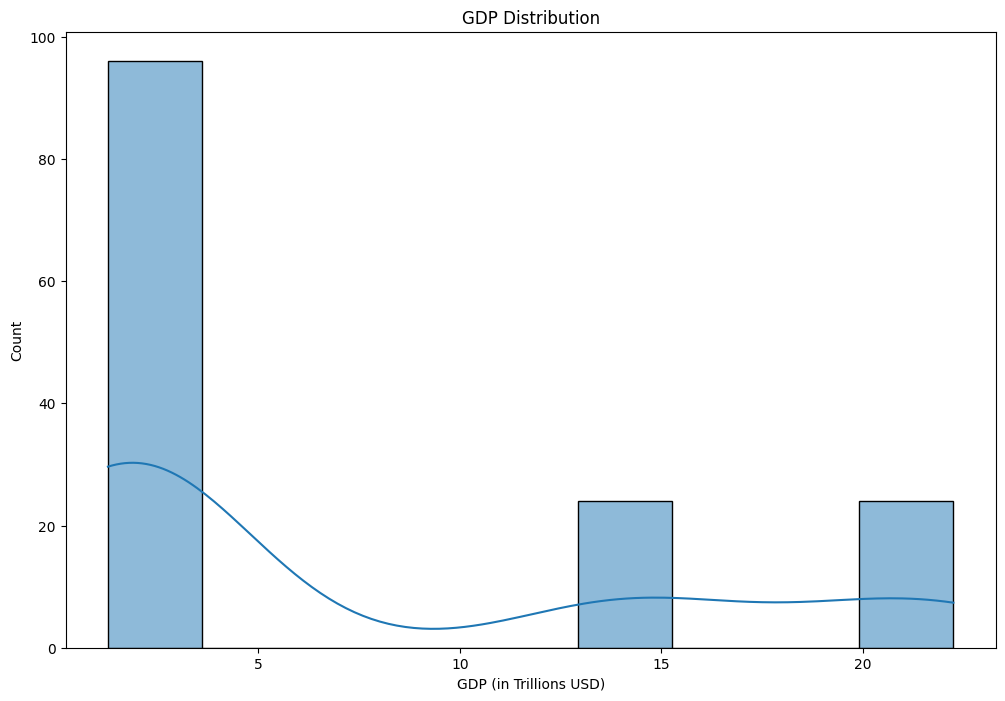

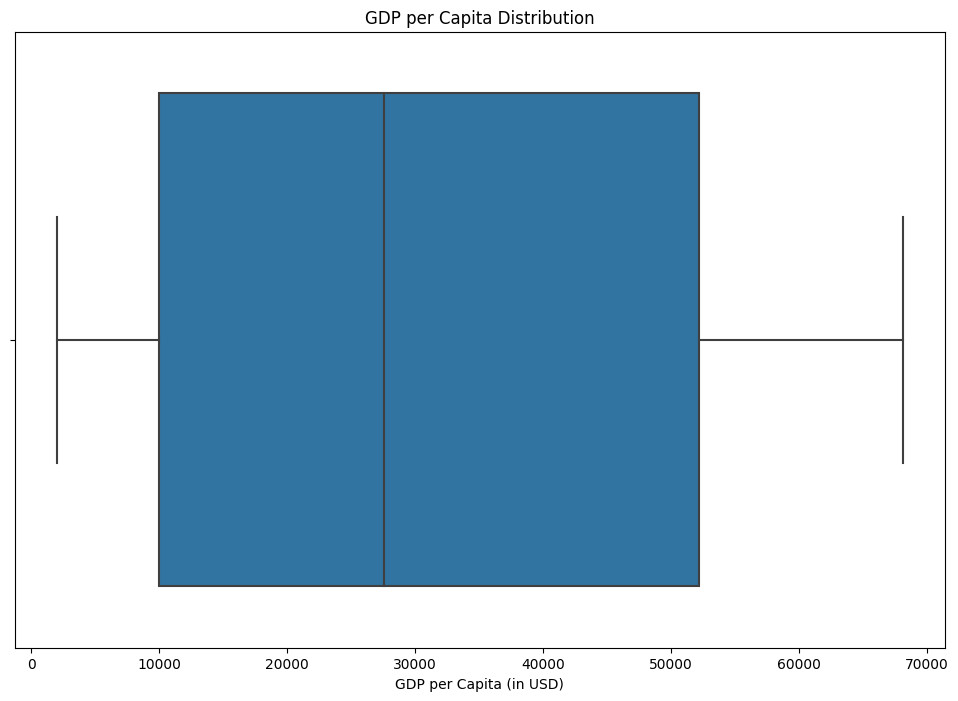

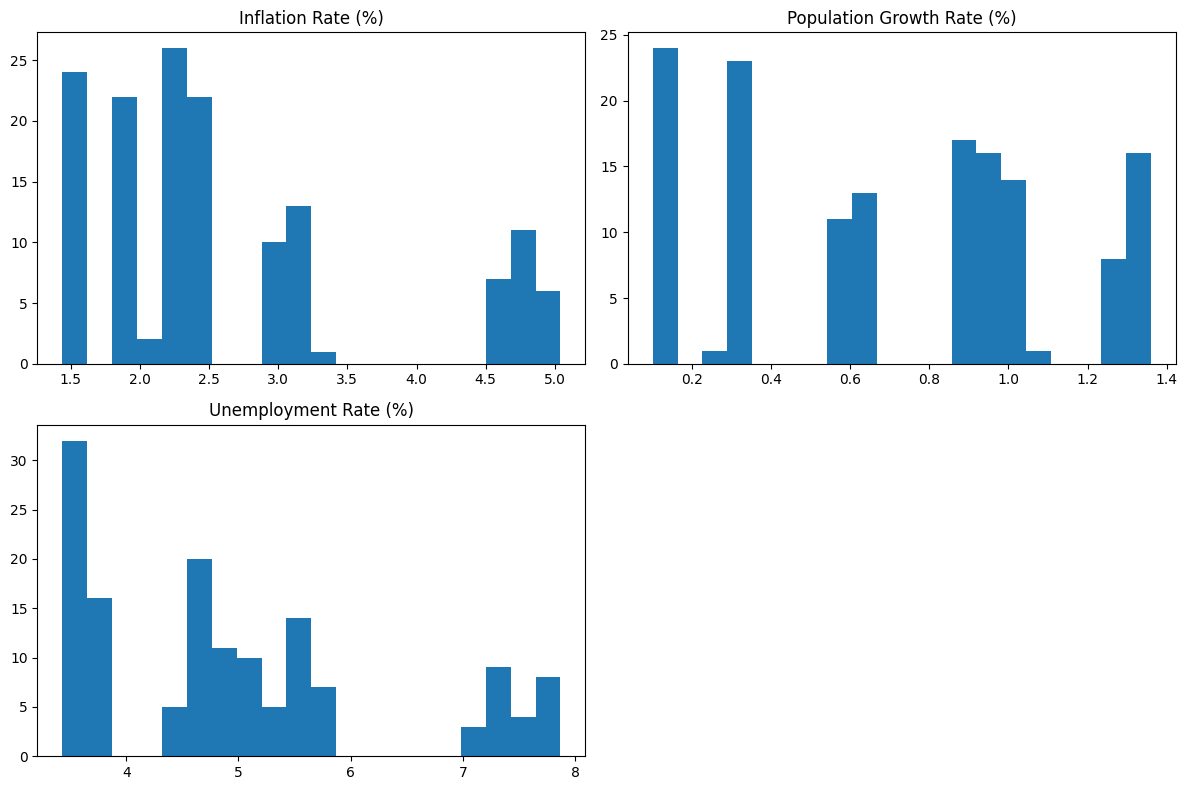

In [7]:
# Set plot size
plt.figure(figsize=(12, 8))

# Plot distribution for GDP
sns.histplot(df['GDP (in Trillions USD)'], kde=True)
plt.title('GDP Distribution')
plt.show()

# Plot boxplot for GDP per Capita
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['GDP per Capita (in USD)'])
plt.title('GDP per Capita Distribution')
plt.show()

# Plot histograms for Inflation Rate, Population Growth Rate, Unemployment Rate
variables = ['Inflation Rate (%)', 'Population Growth Rate (%)', 'Unemployment Rate (%)']
df[variables].hist(bins=20, figsize=(12, 8), grid=False)
plt.tight_layout()
plt.show()


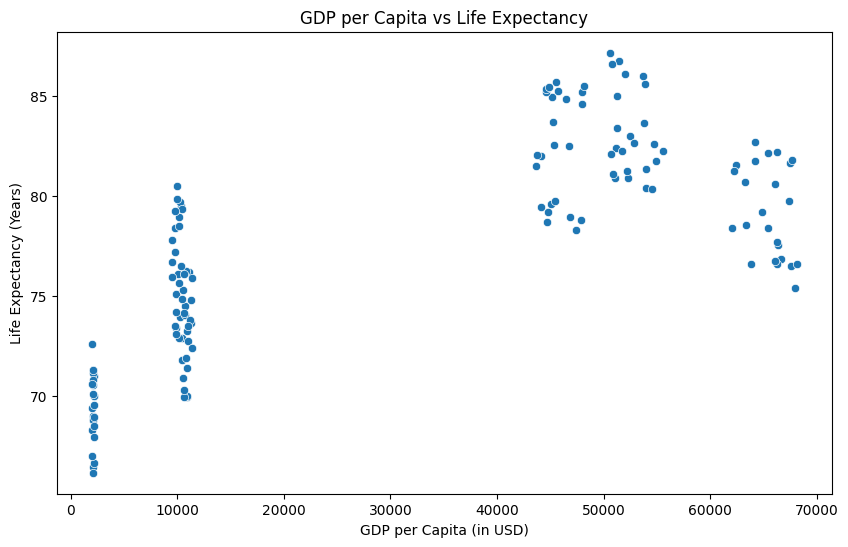

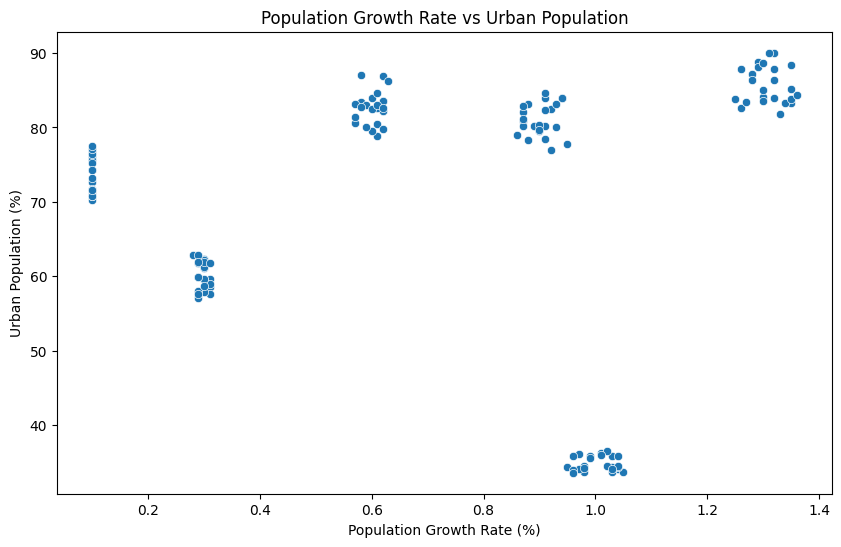

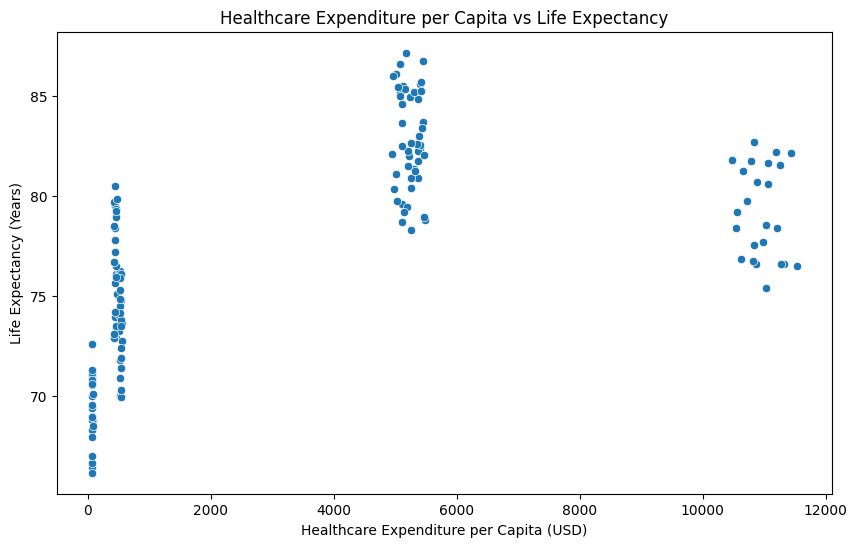

In [8]:
# GDP per Capita vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per Capita (in USD)', y='Life Expectancy (Years)', data=df)
plt.title('GDP per Capita vs Life Expectancy')
plt.show()

# Population Growth Rate vs Urban Population (%)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population Growth Rate (%)', y='Urban Population (%)', data=df)
plt.title('Population Growth Rate vs Urban Population')
plt.show()

# Healthcare Expenditure per Capita vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Healthcare Expenditure per Capita (USD)', y='Life Expectancy (Years)', data=df)
plt.title('Healthcare Expenditure per Capita vs Life Expectancy')
plt.show()


<Figure size 1200x800 with 0 Axes>

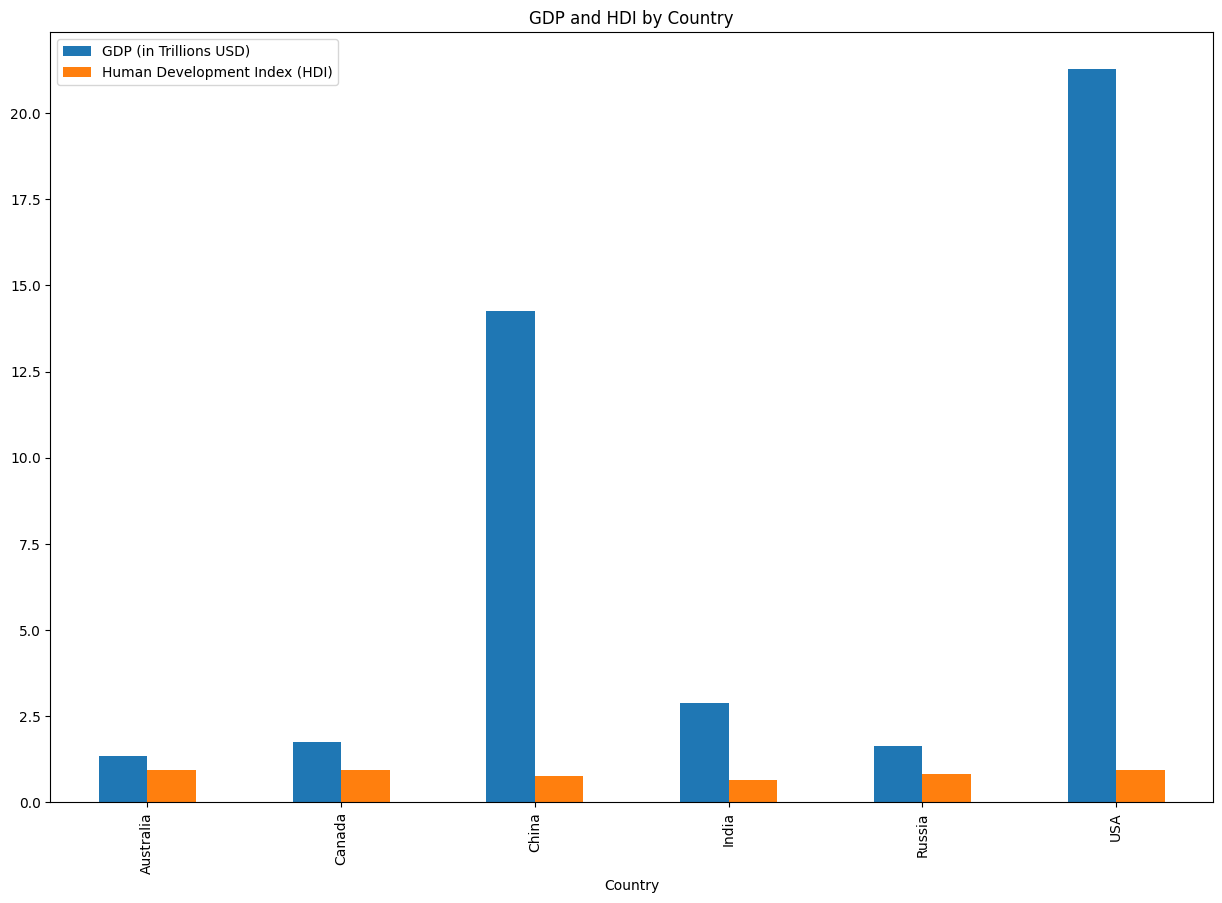

In [9]:
# Group data by country and calculate mean
df_grouped = df.groupby('Country').mean()

# GDP and HDI comparison across countries
plt.figure(figsize=(12, 8))
df_grouped[['GDP (in Trillions USD)', 'Human Development Index (HDI)']].plot(kind='bar', figsize=(15, 10))
plt.title('GDP and HDI by Country')
plt.show()


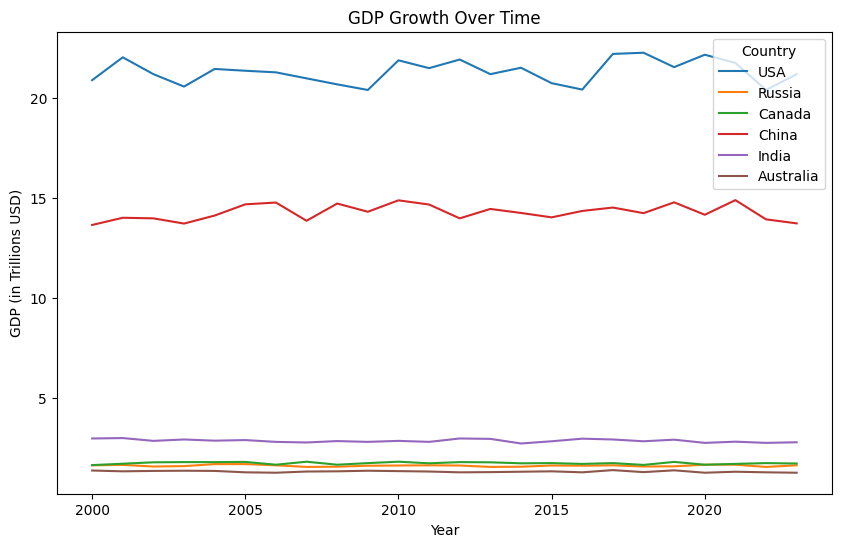

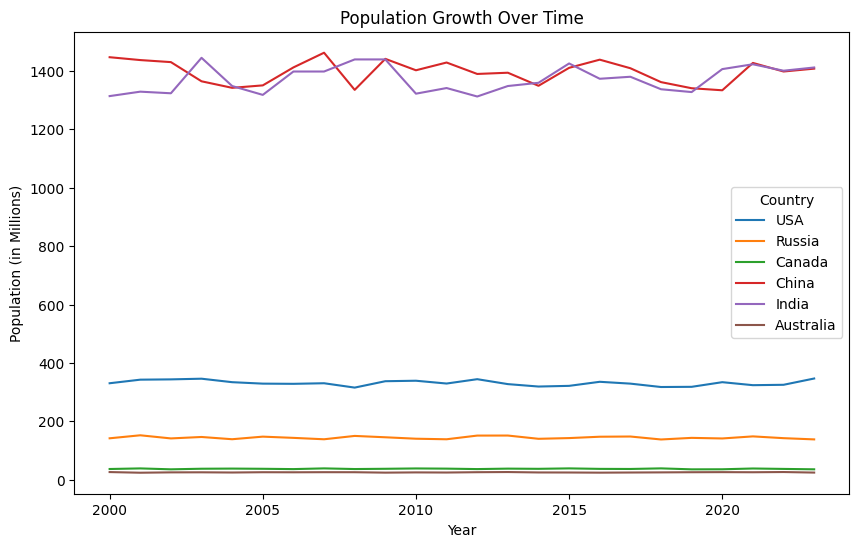

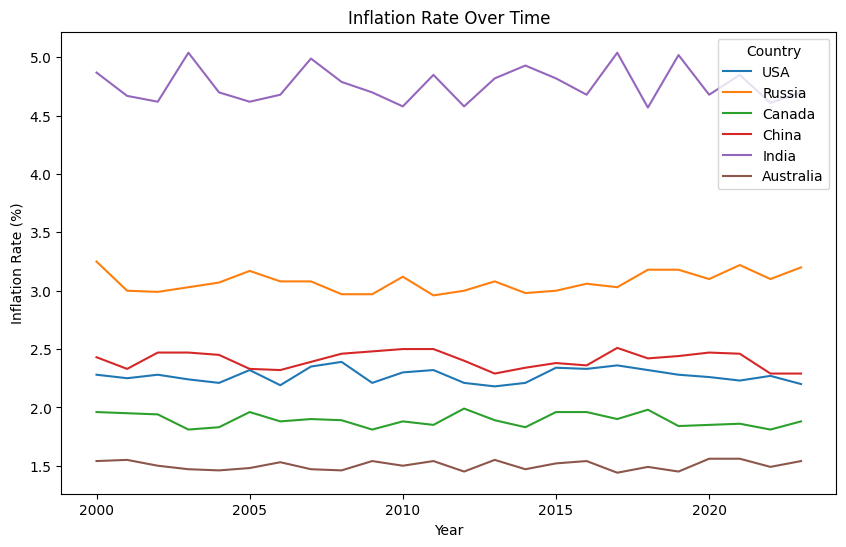

In [10]:
# Plot GDP growth over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='GDP (in Trillions USD)', hue='Country', data=df)
plt.title('GDP Growth Over Time')
plt.show()

# Plot Population growth over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Population (in Millions)', hue='Country', data=df)
plt.title('Population Growth Over Time')
plt.show()

# Plot Inflation Rate over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Inflation Rate (%)', hue='Country', data=df)
plt.title('Inflation Rate Over Time')
plt.show()


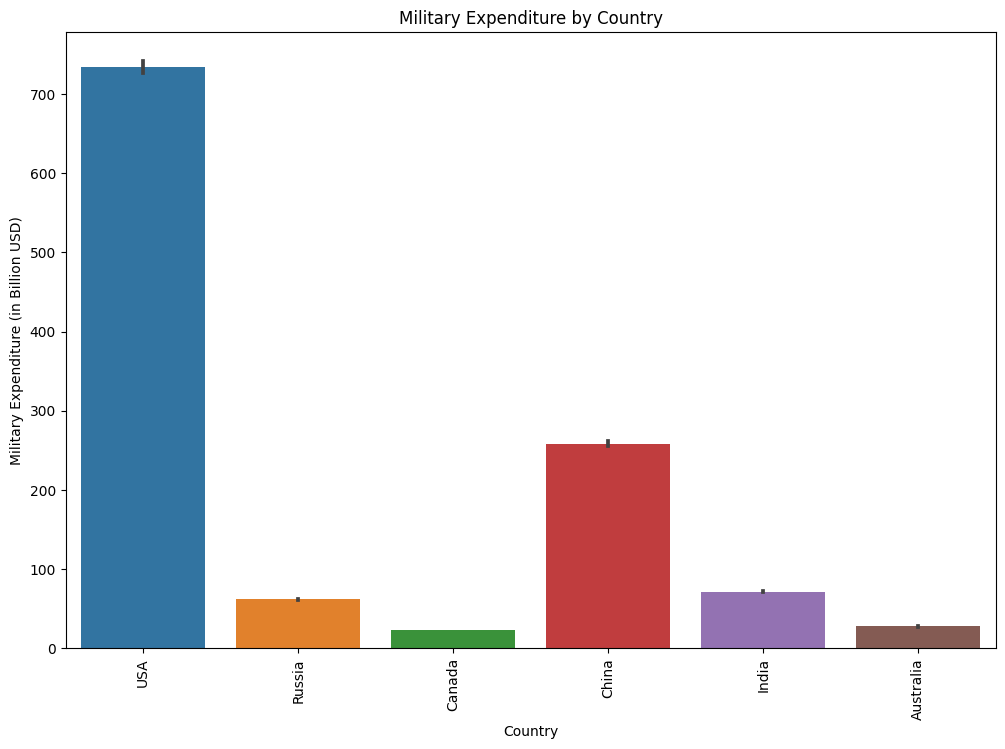

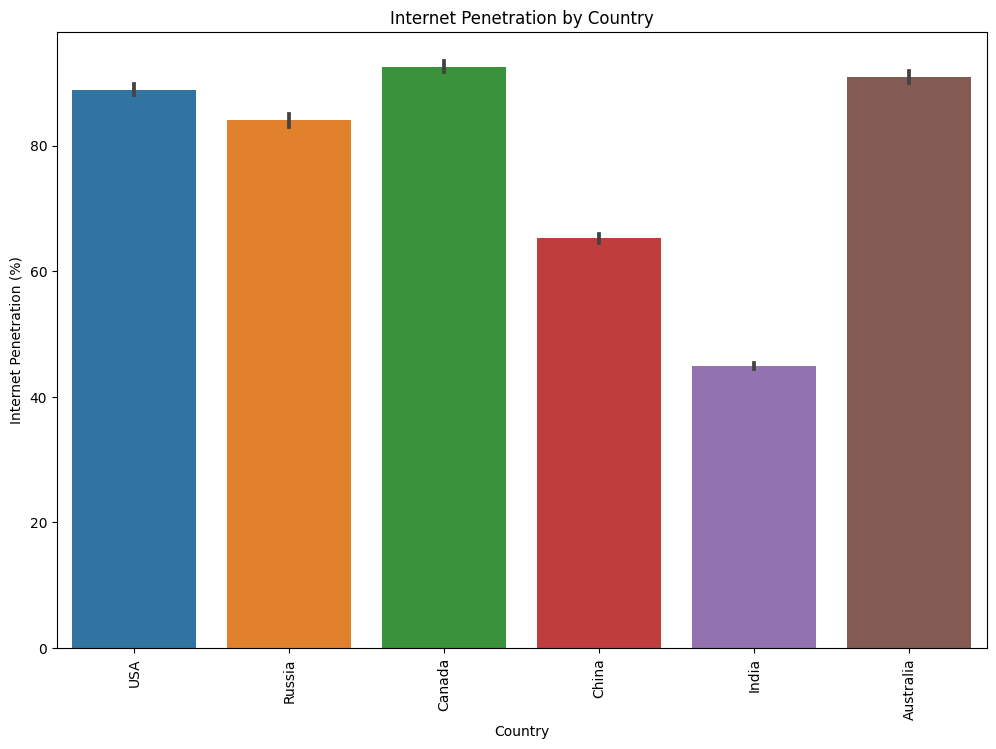

In [11]:
# Bar plot for Military Expenditure by Country
plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='Military Expenditure (in Billion USD)', data=df)
plt.xticks(rotation=90)
plt.title('Military Expenditure by Country')
plt.show()

# Bar plot for Internet Penetration by Country
plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='Internet Penetration (%)', data=df)
plt.xticks(rotation=90)
plt.title('Internet Penetration by Country')
plt.show()



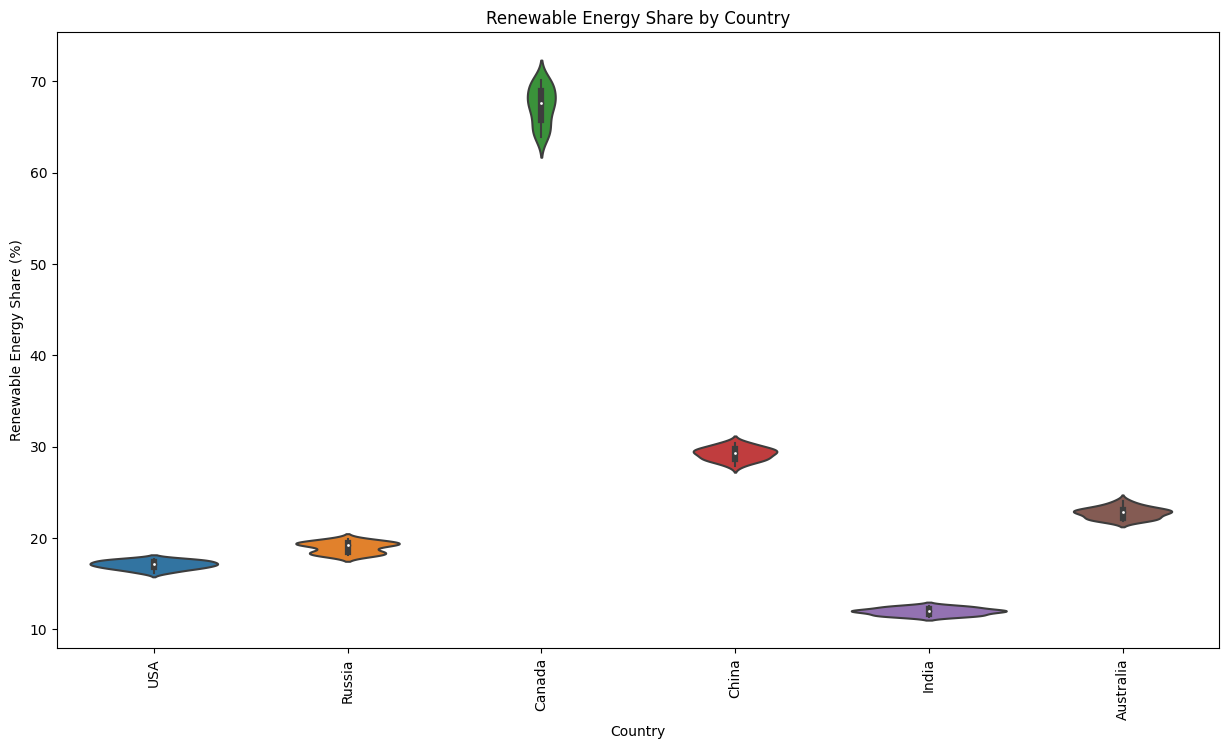

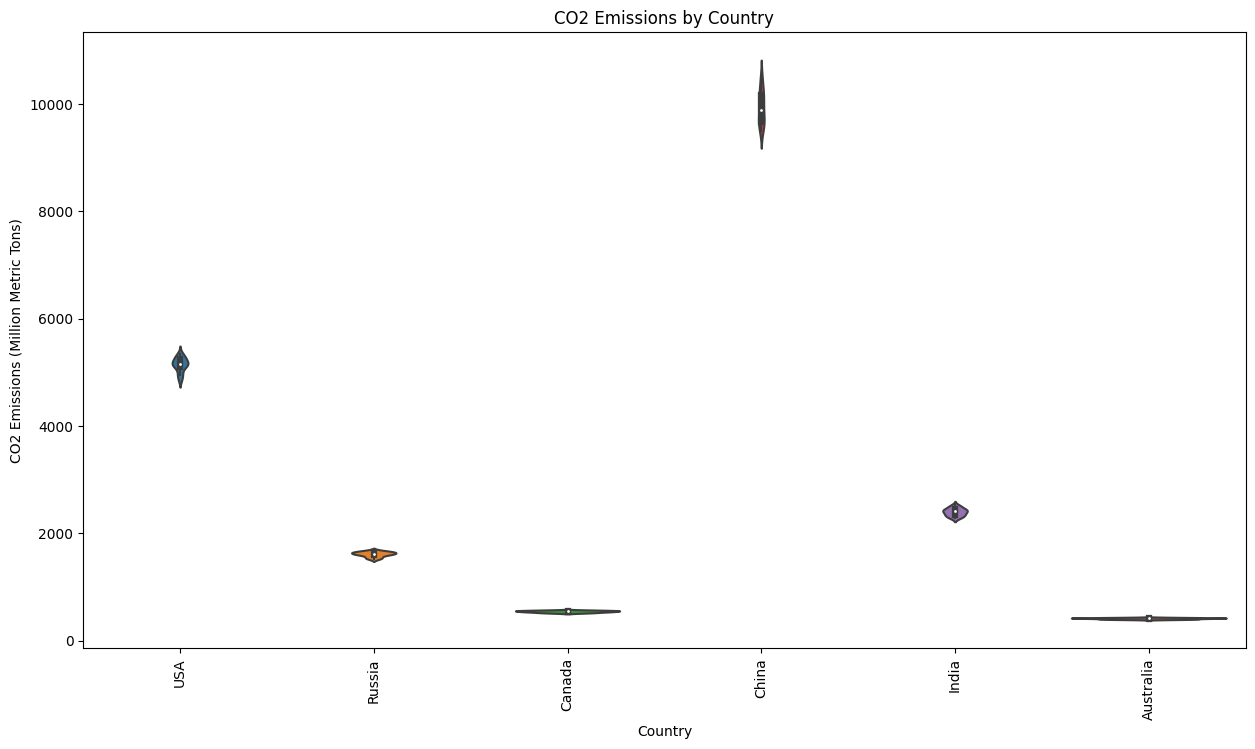

In [12]:
# Violin plot for Renewable Energy Share by Country
plt.figure(figsize=(15, 8))
sns.violinplot(x='Country', y='Renewable Energy Share (%)', data=df)
plt.xticks(rotation=90)
plt.title('Renewable Energy Share by Country')
plt.show()

# Violin plot for CO2 Emissions by Country
plt.figure(figsize=(15, 8))
sns.violinplot(x='Country', y='CO2 Emissions (Million Metric Tons)', data=df)
plt.xticks(rotation=90)
plt.title('CO2 Emissions by Country')
plt.show()


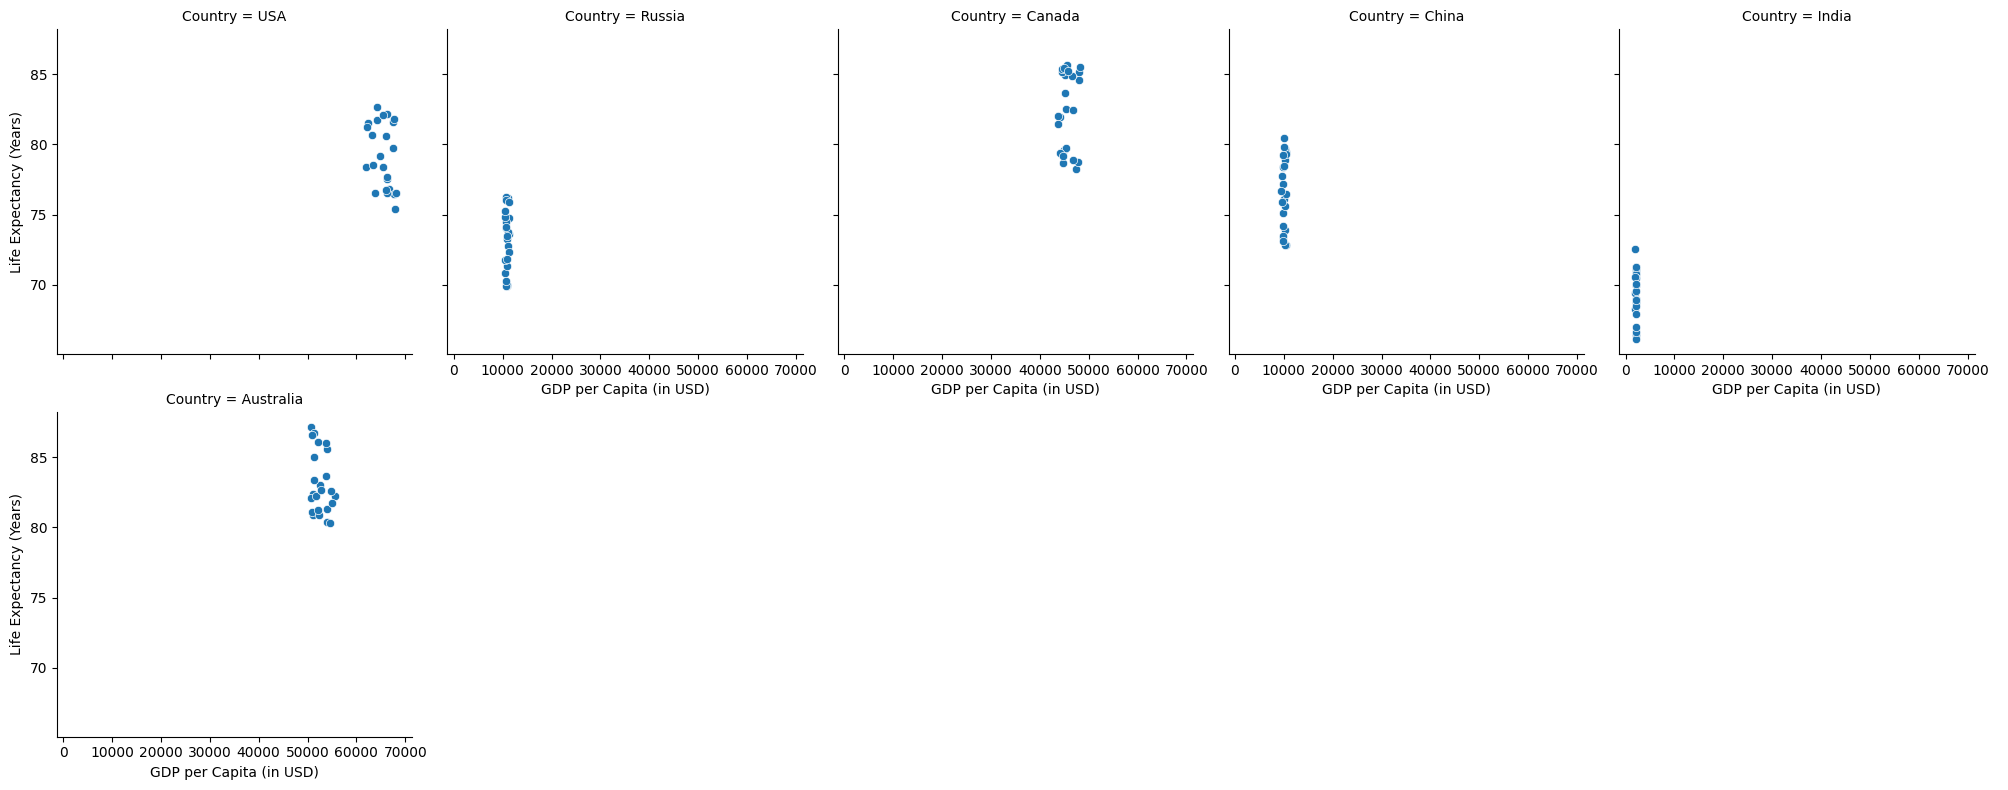

In [13]:
# FacetGrid for comparing GDP and Life Expectancy across multiple countries
g = sns.FacetGrid(df, col='Country', col_wrap=5, height=4)
g.map(sns.scatterplot, 'GDP per Capita (in USD)', 'Life Expectancy (Years)')
g.add_legend()
plt.show()


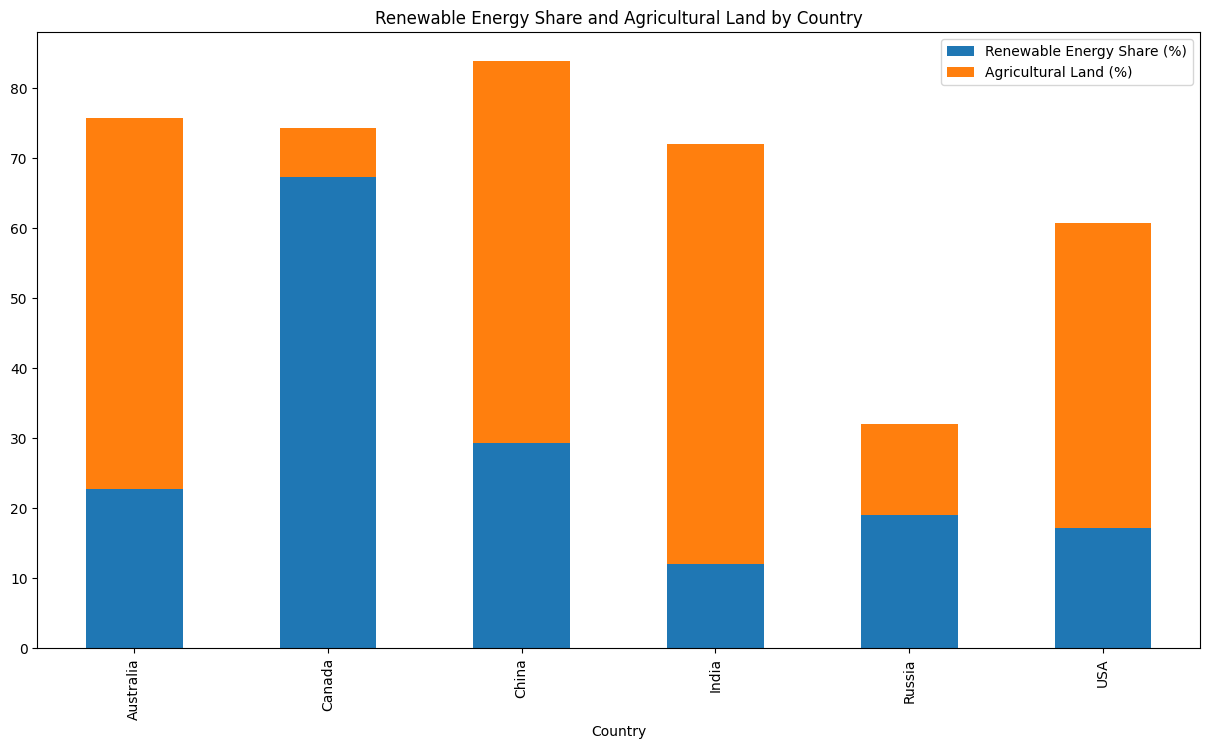

In [14]:
# Stacked bar chart for Renewable Energy Share and Agricultural Land by Country
df_grouped = df.groupby('Country').mean()

df_grouped[['Renewable Energy Share (%)', 'Agricultural Land (%)']].plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Renewable Energy Share and Agricultural Land by Country')
plt.show()


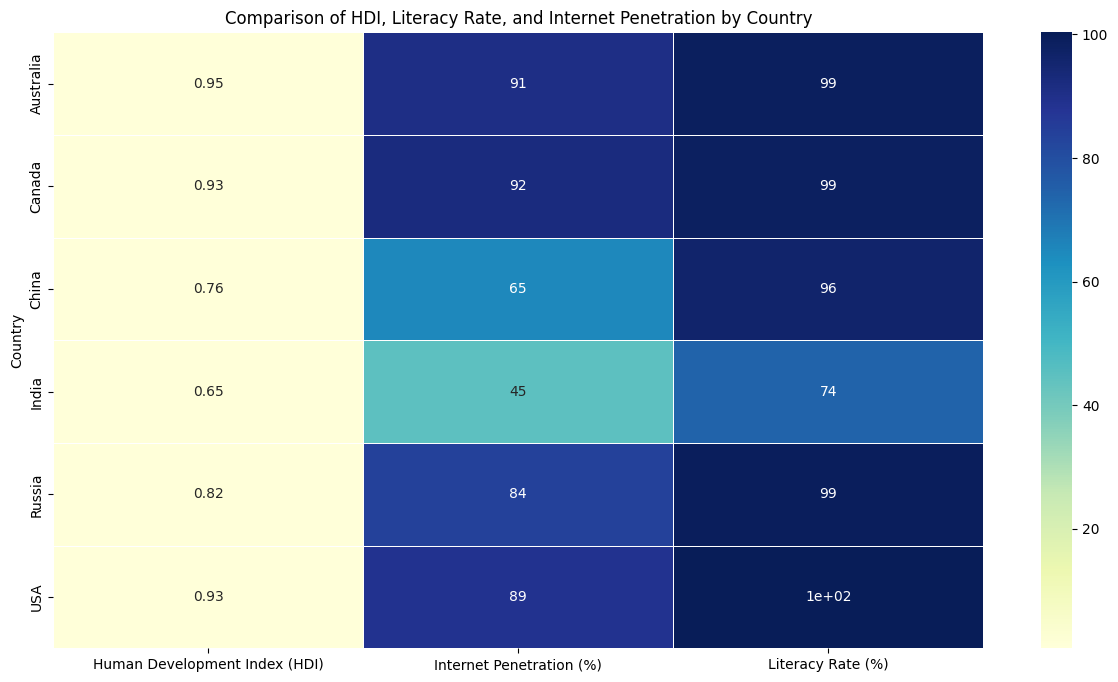

In [15]:
# Heatmap for comparing countries across key metrics
df_pivot = df.pivot_table(values=['Human Development Index (HDI)', 'Literacy Rate (%)', 
                                  'Internet Penetration (%)'], index='Country')

plt.figure(figsize=(15, 8))
sns.heatmap(df_pivot, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Comparison of HDI, Literacy Rate, and Internet Penetration by Country')
plt.show()


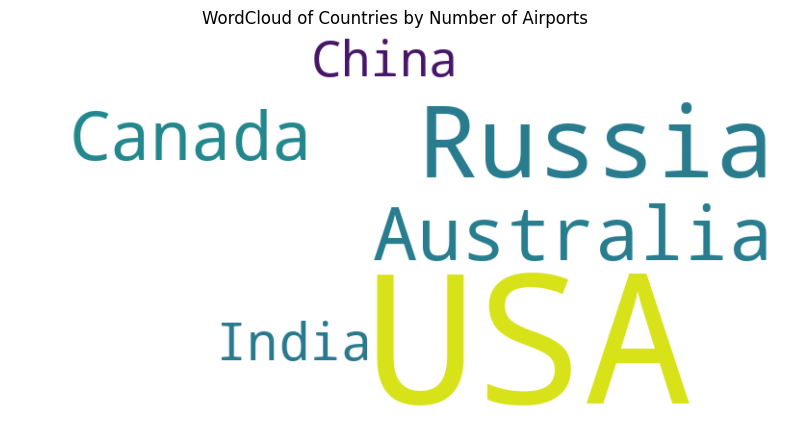

In [16]:
# WordCloud for countries based on number of airports
from wordcloud import WordCloud

# Convert the data into a dictionary {Country: Number of Airports}
country_airports = dict(zip(df['Country'], df['Number of Airports']))

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(country_airports)

# Display WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Countries by Number of Airports')
plt.show()


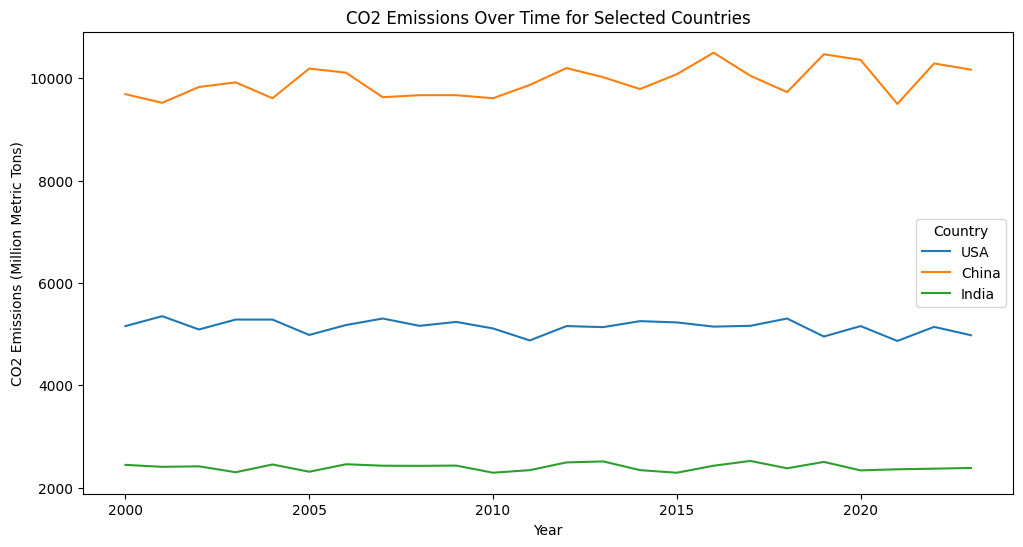

In [17]:
# Plot CO2 Emissions over time for specific countries
countries = ['USA', 'China', 'India']  # Replace with the countries you are interested in
df_filtered = df[df['Country'].isin(countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='CO2 Emissions (Million Metric Tons)', hue='Country', data=df_filtered)
plt.title('CO2 Emissions Over Time for Selected Countries')
plt.show()
